## Observations and Insights 

In [125]:
##THREE OBSERVATIONS OF INSIGHTS ABOUT THE DATA 

##OBSERVATION 1
#The Propriva treatment was tested the least amount of times on the mice, indicated by the least amount of measurements recorded.  


In [125]:
##OBSERVATION 2
#There were more male mice tested than female mice. 

In [125]:
##OBSERVATION 3
#Based on the linear regression line, as the weight of the mice increases, generally speaking, the average tumor volume is larger. The correlation is 0.84. 


In [52]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib.pylab import rcParams
sns.set()


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [53]:
# Combine the data into a single dataset

mouse_meta_study_df = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID"])

# Display the data table for preview
mouse_meta_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice.
len(mouse_meta_study_df)


1893

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_time = mouse_meta_study_df[mouse_meta_study_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.journaldev.com/33488/pandas-drop-duplicate-rows-drop_duplicates-function

clean_mouse_df = mouse_meta_study_df.drop_duplicates("Mouse ID")
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [57]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df)


249

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_groups = mouse_meta_study_df.groupby(mouse_meta_study_df["Drug Regimen"])


mean=regimen_groups["Tumor Volume (mm3)"].mean()
median=regimen_groups["Tumor Volume (mm3)"].median()
variance=regimen_groups["Tumor Volume (mm3)"].var()
std_dev=regimen_groups["Tumor Volume (mm3)"].std()
std_err=regimen_groups["Tumor Volume (mm3)"].sem()

In [59]:
# Assemble the resulting series into a single summary dataframe.
#PANDAS DATA FRAME METHOD 

summary_statistics_df = {
    "Mean Tumor Volume":mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev, "Tumor Volume Std. Err.": std_err}

single_sum_df=pd.DataFrame(summary_statistics_df)
single_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# MATLIB DATA FRAME 

agg_df = regimen_groups["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [61]:
mouse_drug_group = mouse_meta_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_drug_group


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

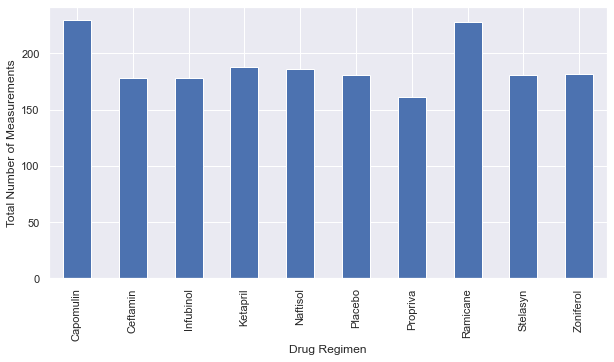

In [62]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Group Drug Regiment and Mouse ID together to plot 
mouse_drug_group.plot(kind="bar", figsize=(10,5))

#Chart Titles
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements");

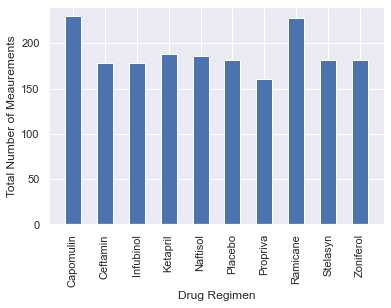

In [63]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(mouse_drug_group))

plt.bar(x_axis,mice,color='b', alpha = 1.0, align = "center", width = 0.5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]);
plt.xticks(rotation=90)

#set the x limits of the current chart 
plt.xlim(-0.75, len(x_axis)-0.25)

#set the y limits of the current chart 
plt.ylim(0,max(mice)+10)

#Give our chart some labels and titles 
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Meaurements");



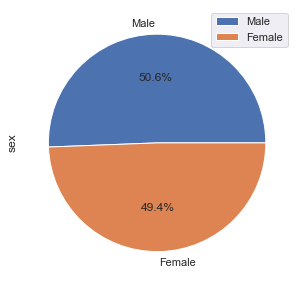

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#PANDAS PIE CHART 

#create new data frame for sex and mouse ID to count values 
mouse_sex_group = mouse_meta_study_df.groupby(["Sex"]).count()["Mouse ID"]

mouse_sex_df = pd.DataFrame({'sex':[958,935]},
                            index=['Male', 'Female'],)
plt.title=("Sex")
plot = mouse_sex_df.plot.pie(y='sex', figsize=(5,5,), autopct='%1.1f%%')

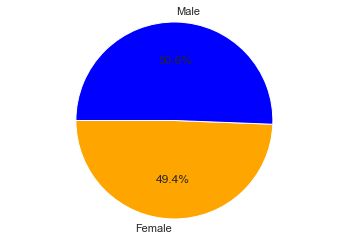

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#labels for the sections of the pie chart 
labels = ["Female", "Male"]

#the values of each section of the pie chart 
sizes=[935,958]

# the colors of each section
colors=["orange", "blue"]

#create pie chart
plt.pie(sizes, labels=labels,colors=colors,
       autopct='%1.1f%%', startangle=180);

#pie chart with equal axes
plt.axis("equal");


## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#capture drug specific four regimens using isin to check value exists
##https://www.geeksforgeeks.org/python-pandas-dataframe-isin/

four_drug_df = mouse_meta_study_df[mouse_meta_study_df["Drug Regimen"].isin(["Capomulin", "Infubinol", "Ramicane", "Ceftamin"])]
four_drug_df

four_drug_group = four_drug_df.groupby(["Drug Regimen", "Mouse ID"]).last(["Timepoint"])
four_drug_group

time_ordered = four_drug_group.sort_values(["Timepoint"], ascending = True)
time_ordered.tail()


Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse ID                                                          
Ceftamin     k210              15          28         45           68.923185   
             j296              24          30         45           61.849023   
             a275              20          28         45           62.999356   
             p438              11          26         45           61.433892   
Ramicane     z578              11          16         45           30.638696   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Ceftamin     k210                     3  
             j296                     3  
             a275                     3  
             p438                     1  
Ramicane     z578                     0

In [67]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_timepoint_meta_study= pd.merge(mouse_meta_study_df, time_ordered, how= "left", on = ["Mouse ID"])
new_df = merge_timepoint_meta_study.dropna(how ='any') 
new_df


,Mouse ID,Drug Regimen,Sex,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,21.0,16.0,45.0,22.050126,1.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,21.0,16.0,45.0,22.050126,1.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,21.0,16.0,45.0,22.050126,1.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,21.0,16.0,45.0,22.050126,1.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,21.0,16.0,45.0,22.050126,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2,24.0,25.0,45.0,62.754451,3.0
1869,z581,Infubinol,Female,24,25,30,56.286750,2,24.0,25.0,45.0,62.754451,3.0
1870,z581,Infubinol,Female,24,25,35,58.628399,3,24.0,25.0,45.0,62.754451,3.0
1871,z581,Infubinol,Female,24,25,40,60.053740,3,24.0,25.0,45.0,62.754451,3.0


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
#received help from tutor Ibrahim Jabarkhil on for loop 

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

for treatment in treatment_list:
    time_volume=new_df.loc[new_df["Drug Regimen"]== treatment, "Tumor Volume (mm3)_y"]
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume.append(time_volume)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#the final tumor volume of each mouse across four of the treatment regime
    
    quartiles = time_volume.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr = upperq-lowerq
    

    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


#Print Drug Names, IQRs 
    print(treatment)
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The median is : {quartiles[0.5]}\n")
    
#Outliers
    print("Treatment Specific Outliers")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")


Capomulin
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is : 37.718505085

Treatment Specific Outliers
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
The lower quartile is: 31.09533505
The upper quartile is: 38.81036633
The interquartile range is: 7.715031280000002
The median is : 36.37451039

Treatment Specific Outliers
Values below 19.522788129999995 could be outliers.
Values above 50.38291325 could be outliers.

Infubinol
The lower quartile is: 57.03186187
The upper quartile is: 66.19691151
The interquartile range is: 9.165049640000007
The median is : 62.276341445

Treatment Specific Outliers
Values below 43.28428740999999 could be outliers.
Values above 79.94448597000002 could be outliers.

Ceftamin
The lower quartile is: 59.74190064
The upper quartile is: 64.72983655
The interquartile range is: 4.9879359100000045
The median is : 62.424189775

Tre

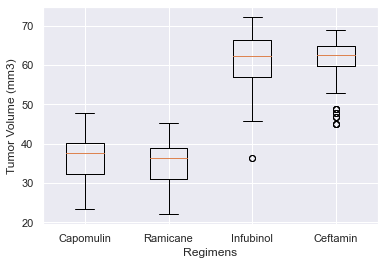

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interestp

plt.boxplot(tumor_volume, labels=treatment_list)
#plt.title("Final Tumor Volume of Each Mouse Across Four Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Regimens")
print()

## Line and Scatter Plots

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

##new data drame with Capomulin only 

capomulin= mouse_meta_study_df.loc[mouse_meta_study_df["Drug Regimen"].isin(["Capomulin"])]
capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [71]:
##select mouse m601 to look at 

mouse_capomulin_df=capomulin.loc[capomulin["Mouse ID"]==("m601")]
mouse_capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


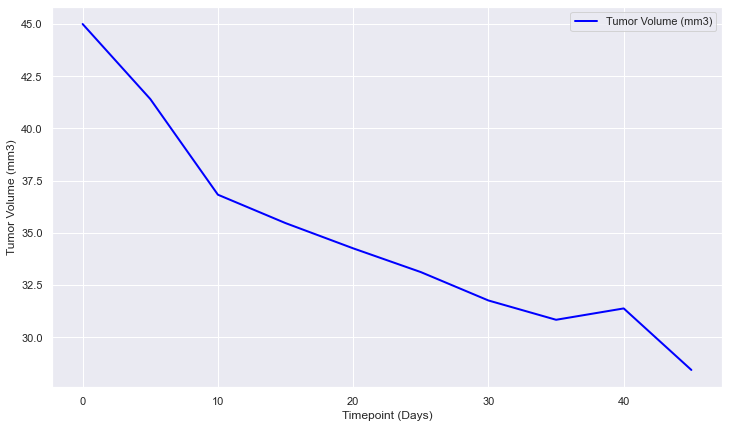

In [72]:
##Create line graph for specfic mouse m601

mouse_capomulin_df_x_y = mouse_capomulin_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
mouse_capomulin_df_x_y.set_index("Timepoint").plot(color = "blue", figsize=(12,7),linewidth=2.0)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.show();

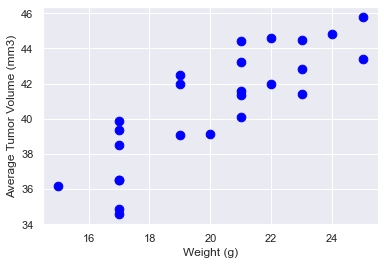

In [73]:
# Generate a scatter plot depicting mouse weight versus average tumor volume for the Capomulin regimen

capomulin= mouse_meta_study_df.loc[mouse_meta_study_df["Drug Regimen"].isin(["Capomulin"])]
weight_tumor= capomulin.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_tumor_group = weight_tumor.groupby(["Mouse ID"]).mean(["Tumor Volume (mm3)"])

#change name of Tumor Volume to average for graph 
avg_volume = weight_tumor_group.rename(columns={"Tumor Volume (mm3)" : "Average Tumor Volume (mm3)"})

#Plot Scatter Plot for Weight (g) vs Average Tumor Vol. 

avg_volume.plot.scatter(x= "Weight (g)", y= "Average Tumor Volume (mm3)", s=75, color="blue");



## Correlation and Regression

In [74]:
weight = avg_volume.iloc[:,0]
tumor = avg_volume.iloc[:,1]
correlation = st.pearsonr(weight, tumor)

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


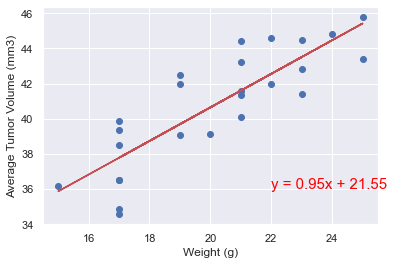

In [75]:
#Calculate the linear regression model for mouse weight versus average tumor volume 
#The linear regression model has been plotted depicting moue weight verus average tumor volume 

x_values = avg_volume.iloc[:,0]
y_values = avg_volume.iloc[:,1]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

